# Importing Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
from random import randint
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.preprocessing import image

# Sample Data

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[2 3 2 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


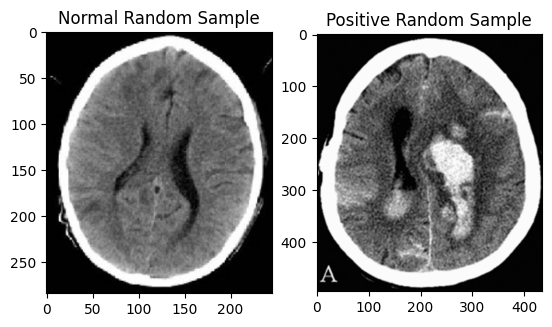

In [4]:
# read random normal and positive images
def random_image():
  positive_train_path = '/content/drive/MyDrive/dataset/head_ct/train/hemorrhage_train'
  normal_train_path = '/content/drive/MyDrive/dataset/head_ct/train/norm_train'

  rand_int_normal = randint(100, 190)
  rand_int_positive = "%03d" % randint(0, 90)

  normal_sample_image = cv2.imread(normal_train_path+'/'+str(rand_int_normal)+'.png', cv2.IMREAD_GRAYSCALE)
  plt.subplot(1,2,1)
  print(normal_sample_image)
  plt.imshow(normal_sample_image, cmap = 'gray')
  plt.title("Normal Random Sample")

  positive_sample_image = cv2.imread(positive_train_path+'/'+str(rand_int_positive)+'.png', cv2.IMREAD_GRAYSCALE)
  plt.subplot(1,2,2)
  print(positive_sample_image)
  plt.imshow(positive_sample_image, cmap = 'gray')
  plt.title("Positive Random Sample")

random_image()


# Data Preprocessing

## Train data

In [10]:
# train data preprocessing
train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range=0.2,
                               zoom_range = 0.2,
                               horizontal_flip= True)

train_set = train_gen.flow_from_directory('/content/drive/MyDrive/dataset/head_ct/train',
                                          target_size = (100, 100),
                                          batch_size = 50,
                                          class_mode= 'binary')

# test data preprocessing
test_gen = ImageDataGenerator(rescale = 1./255)
test_set = test_gen.flow_from_directory('/content/drive/MyDrive/dataset/head_ct/test',
                                        target_size= (100,100),
                                        batch_size = 50,
                                        class_mode= 'binary')

Found 180 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Building CNN model

In [11]:
# initialize cnn
classifier = Sequential()

# 1.convolutional layer
classifier.add(Conv2D(filters=50, kernel_size =3, activation = 'relu', input_shape = [100, 100, 3])) # note: grayscale images
classifier.add(Conv2D(filters=50, kernel_size =3, activation = 'relu', input_shape = [100, 100, 3])) # note: grayscale images


# 2.pooling layer
classifier.add(MaxPooling2D(pool_size = 2, strides=2))

# 3. convolutional layer
classifier.add(Conv2D(filters = 50, kernel_size = 3 , activation = 'relu'))
classifier.add(Conv2D(filters = 50, kernel_size = 3 , activation = 'relu'))

# 4. pooling layer
classifier.add(MaxPooling2D(pool_size = 2, strides=2))

# 5. flatten layer
classifier.add(Flatten())

# 6. full connection
classifier.add(Dense(units = 200 , activation  = 'relu'))

# 7. output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compile CNN model

In [17]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train CNN model

In [18]:
history = classifier.fit(x = train_set , validation_data = test_set, epochs = 100)

Epoch 1/100
4/4 [==============================] - 5s 322ms/step - loss: 3.5969 - accuracy: 0.6000 - val_loss: 1.0672 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 2s 599ms/step - loss: 0.7547 - accuracy: 0.5000 - val_loss: 0.6858 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 2s 520ms/step - loss: 0.6922 - accuracy: 0.4889 - val_loss: 0.6626 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 2s 525ms/step - loss: 0.6911 - accuracy: 0.5222 - val_loss: 0.6312 - val_accuracy: 0.6500
Epoch 5/100
4/4 [==============================] - 2s 521ms/step - loss: 0.6336 - accuracy: 0.6611 - val_loss: 0.6336 - val_accuracy: 0.5500
Epoch 6/100
4/4 [==============================] - 3s 839ms/step - loss: 0.6090 - accuracy: 0.6500 - val_loss: 0.7135 - val_accuracy: 0.4500
Epoch 7/100
4/4 [==============================] - 2s 607ms/step - loss: 0.5453 - accuracy: 0.7222 - val_loss: 0.7452 - val_accuracy: 0.5000
Epoch 8/100
4

# Model Summary

In [19]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 50)        1400      
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 50)        22550     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 48, 48, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 50)        22550     
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 50)        22550     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 22, 50)        0         
 g2D)                                                 

# Accuracy Graph

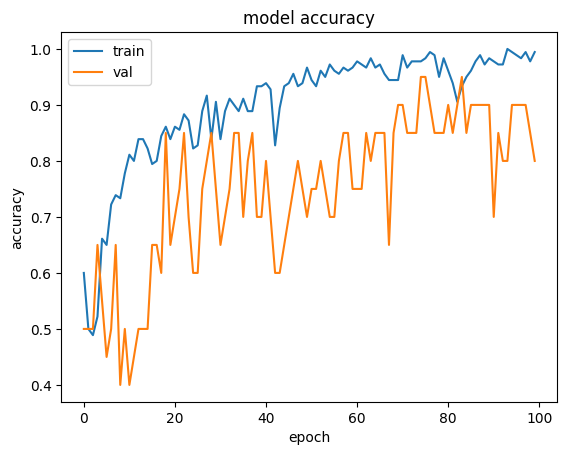

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss Graph

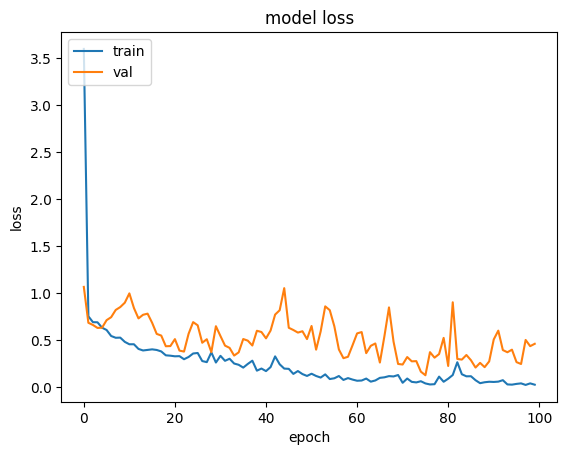

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Prediction

In [25]:
test_case = image.load_img('/content/test_case.jpg', target_size = (100, 100))
test_case = image.img_to_array(test_case)
test_case = np.expand_dims(test_case, axis = 0)
result = classifier.predict(test_case)
print(train_set.class_indices, result)
if result[0][0] == 0:
  print("Hemorrhage")
else:
  print("Normal")

1/1 [==============================] - 0s 389ms/step
{'hemorrhage_train': 0, 'norm_train': 1} [[0.]]
Hemorrhage


# Save Model

In [26]:
classifier.save('CNN.h5')
print("Model has been saved")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model has been saved
